In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [3]:
data = load_iris()
X = data.data[:,[2,3]]
y = data.target

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:
RF = RandomForestClassifier(criterion='entropy',n_estimators=10,max_depth=None,random_state=10,n_jobs=2)

In [27]:
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [28]:
marker = ('s','^','*')
colors = ['red','green','blue','gray']
cmap = ListedColormap(colors[:len(np.unique(y))])
    
def plot_decision_boundry(X,y,classifier):
    X1_min,X1_max = X[:,0].min() - 1,X[:,0].max() + 1
    X2_min,X2_max = X[:,1].min() - 1,X[:,1].max() + 1
    XX1,XX2 = np.meshgrid(np.arange(X1_min,X1_max,0.02),np.arange(X2_min,X2_max,0.02))
    z = classifier.predict(np.array([XX1.ravel(),XX2.ravel()]).T)
    z = z.reshape(XX1.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(XX1,XX2,z,alpha=0.3,cmap=cmap)
    plt.title('Random forest decision boundry')
    for idx,clas in enumerate(np.unique(y)):
        plt.scatter(X[y==clas,0],X[y==clas,1],alpha=1,marker=marker[idx],label=clas)

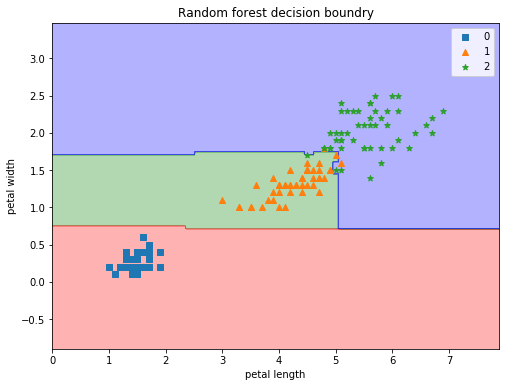

In [29]:
plot_decision_boundry(X=np.vstack((X_train,X_test)),y=np.hstack((y_train,y_test)),classifier=RF)
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()